## DATA 690 Homework 3 (60 points - Due on Sunday, October 2, 2022 by 11:00 pm ET)

The output of this assignment for submission should be in PDF format **AND** .py or .ipynb. The name of the file should be as follows: Lastname_Firstname_Homework3.pdf (example: Thomas_Sunela_Homework3.pdf) **AND** Lastname_Firstname_Homework3.ipynb (example: Thomas_Sunela_Assignment3.ipynb. In short, you are submitting the python notebook as well as the pdf of that notebook. Do **NOT** submit .html file, the system will give you an error.

    
Incorrect file name will cost you points!<br>

Instructions for converting a Jupyter Python notebook to PDF: Go to the menu and choose, File --> Download As --> html. Open that html file and print it to PDF. Submit the PDF file **NOT** the html file.

If you are using Google Colab, remember to review the PDF before submitting to ensure that all cells and answers are displayed in the PDF.

**Things to note:**

* Each cell should display an output
* Use only the basic Python concepts and methods
* Use both Markdown and code comments in the Jupyter Notebook as needed

### IF YOU ARE MAKING ANY ASSUMPTIONS, WRITE THAT IN A MARKDOWN CELL OR COMMENT
### $\color{red}{\text{Answer the questions asked as well, not just code}}$



# `tips`

Food servers' tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair treatment of the servers, for whom tips (at least in restaurants in the United States) are a major component of pay.

In one restaurant, a food server recorded the following data on all customers they served during an interval of two and a half months in early 1990. The restaurant, located in a suburban shopping mall, was part of a national chain and served a varied menu. In observance of local law the restaurant offered seating in a non-smoking section to patrons who requested it. Each record includes a day and time, and taken together, they show the server’s work schedule.

A complete description of the variables and their meanings is available in the data dictionary table below:

|obs  | Observation number |
|---  |---                 |
| total_bill | Total bill (cost of the meal), including tax, in US dollars |
| tip | Tip (gratuity) in US dollars |
| sex | Sex of person paying for the meal (0=male, 1=female) |
| smoker | Smoker in party? (0=No, 1=Yes) |
| day | Day of Week (4=Thur, 5=Fri, 6=Sat, 7=Sun) |
| time | Dinner, Lunch |
|size  | Size of the party |

### Exercise 1: (1 points)
<span  style="color:purple; font-size:16px">Read in `tips.csv` data.</span>

In [1]:
import pandas as pd

In [4]:
# Exercise Answer

#pd.read_csv reads the csv File
tips_df = pd.read_csv('tips.csv')
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,7,Dinner,2
1,10.34,1.66,1,0,7,Dinner,3
2,21.01,3.50,1,0,7,Dinner,3
3,23.68,3.31,1,0,7,Dinner,2
4,24.59,3.61,0,0,7,Dinner,4


### Exercise 2: (2 points)
<span  style="color:purple; font-size:16px">Determine the number of rows and columns in the data. What does each row in the data represent?</span>

In [5]:
# Exercise Answer

#shape returns the number of rows and columns in the data
tips_df.shape

(244, 7)

There are 244 Rows and 7 Coulumns in the data

### Exercise 3: (3 points)
<span  style="color:purple; font-size:16px">Determine if there are any missing values in the data.</span>

In [6]:
# Exercise Answer

#Using isnull().sum() to determine missing data
tips_df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

There are no missing values in the Data

### Exercise 4: (5 points)
<span  style="color:purple; font-size:16px">The column names are not very descriptive. Use the `.rename()` method to rename the columns.</span>

Rename the columns as follows:
+ `tip` to `tip_amount`
+ `day` to `day_of_week`
+ `size` to `party_size`


In [7]:
# Exercise Answer

#Using rename() method to rename the columns
rename_columns = {'tip':'tip_amount', 'day':'day_of_week', 'size':'party_size'}
tips_df.rename(columns = rename_columns , inplace=True)

In [8]:
tips_df.columns

Index(['total_bill', 'tip_amount', 'sex', 'smoker', 'day_of_week', 'time',
       'party_size'],
      dtype='object')

### Exercise 5: (5 points)
<span  style="color:purple; font-size:16px">Extract the index using tips.index(). What type of index do you find? Is there a sensical column to use for the index? Why or why not?</span>

In [9]:
# Exercise Answer
tips_df.index

RangeIndex(start=0, stop=244, step=1)

In [10]:
type(tips_df.index)

pandas.core.indexes.range.RangeIndex

- So the index of tips_df is Range Index which is the default index.
- We can refer to each tip by the bill amount (total_bill) (by using meaningful Index). Though we have total_bill column it is not useful data to perform analysis on,  bills are just convenient labels which are useful to understand which bill the tips refer to. 
- We can refer to tip by integer location (using the default RangeIndex)

### Exercise 6: (5 points)
<span  style="color:purple; font-size:16px">Recode the `sex`, `smoker`, and `day_of_week` variables to the coding in the data dictionary description table at the top of the notebook. For example: recode `day_of_week` from the numeric representation (4, 5, 6, 7) to the ('Thur', 'Fri', 'Sat', 'Sun'). </span>

In [11]:
# Exercise Answer

#recoding `day_of_week` from the numeric representation 4, 5, 6, 7 to the 'Thur', 'Fri', 'Sat', 'Sun'
dayofweek_replace = {4: 'Thur', 5:'Fri', 6:'Sat', 7:'Sun'}
tips_df['day_of_week'].replace(dayofweek_replace, inplace=True)
tips_df['day_of_week'].sample(5)

50     Sun
20     Sat
105    Sat
225    Fri
11     Sun
Name: day_of_week, dtype: object

In [12]:
#recoding sex from 0 to male, 1 to female)
sex_replace = {0: 'male', 1:'female'}
tips_df['sex'].replace(sex_replace, inplace=True)
tips_df['sex'].head(5)

0      male
1    female
2    female
3    female
4      male
Name: sex, dtype: object

In [13]:
#recoding smoker from 0 to No, 1 to Yes
smoker_replace = {0: 'No', 1:'Yes'}
tips_df['smoker'].replace(smoker_replace, inplace=True)
tips_df['smoker'].sample(5)

239     No
151     No
172    Yes
218    Yes
77      No
Name: smoker, dtype: object

In [14]:
tips_df.sample(5)

,total_bill,tip_amount,sex,smoker,day_of_week,time,party_size
160,21.50,3.50,female,No,Sun,Dinner,4
17,16.29,3.71,female,No,Sun,Dinner,3
240,27.18,2.00,male,Yes,Sat,Dinner,2
93,16.32,4.30,male,Yes,Fri,Dinner,2
26,13.37,2.00,female,No,Sat,Dinner,2


### Exercise 7: (4 points)
<span  style="color:purple; font-size:16px">How many people were in the largest party served by the waiter? The smallest?</span>

In [15]:
# Exercise Answer
#Using nlargest(1) method to get the Largest Value of Party size
# sort ascending = False also works, tips_df['party_size'].sort_values(ascending=False).head(1)

tips_df['party_size'].nlargest(1)

125    6
Name: party_size, dtype: int64

There were 6 people in the largest party served by the waiter.

In [16]:
#Using nsmallest(1) method to get the Smallest Value of Party size
# sort ascending = true also works, tips_df['party_size'].sort_values(ascending=True).head(1)

tips_df['party_size'].nsmallest(1)

67    1
Name: party_size, dtype: int64

There was only 1 person in the smallest party served by the waiter.

### Exercise 8: (5 points)
<span  style="color:purple; font-size:16px">Create a histogram of the `total_bill` variable using 20 bins. Include a title and customize at least one other aspect of the plot. </span>

<AxesSubplot:title={'center':'Histogram of Total Bill'}, ylabel='Frequency'>

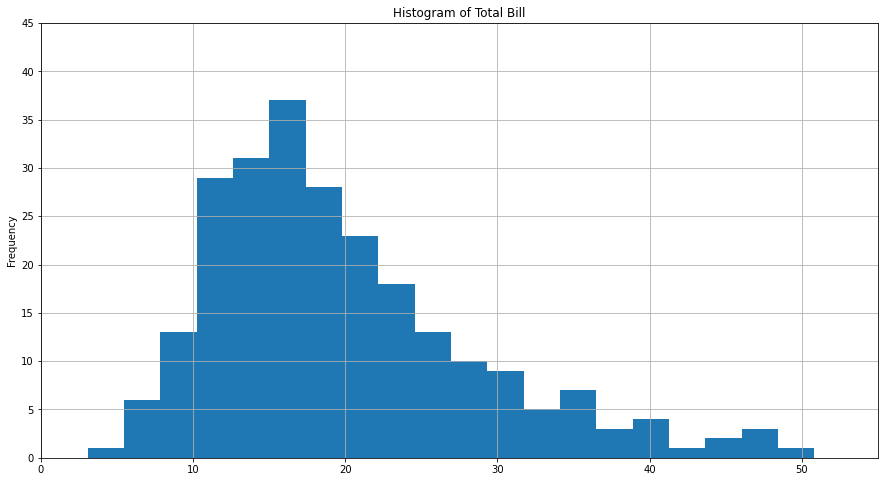

In [19]:
# Exercise Answer
#Histogram of the Total Bill
tips_df['total_bill'].plot(kind = 'hist',
                        bins = 20,
                        title = 'Histogram of Total Bill',
                        grid = True,
                        xlim = (0,55),
                        ylim = (0,45),
                        figsize = (15,8),
                        xlabel = 'Total Bill'
                       )

### Exercise 9: (4 points)
<span  style="color:purple; font-size:16px">What is a 'typical' bill size? Is mean or median better when you say typical?</span>

In [20]:
# Exercise Answer
tips_df['total_bill'].median()

17.795

Median is accurate when we say typical. So the typical bill is 17.795

### Exercise 10: (6 points)
<span  style="color:purple; font-size:16px">Create a new variable, `tip_rate` which is the `tip_amount` divided by `total_bill`. Create a histogram of the new variable. </span>

In [21]:
# Exercise Answer
tips_df['tip_rate'] = tips_df['tip_amount'] / tips_df['total_bill']
tips_df['tip_rate'].head()

0    0.059447
1    0.160542
2    0.166587
3    0.139780
4    0.146808
Name: tip_rate, dtype: float64

<AxesSubplot:title={'center':'Histogram of Tip Rate'}, ylabel='Frequency'>

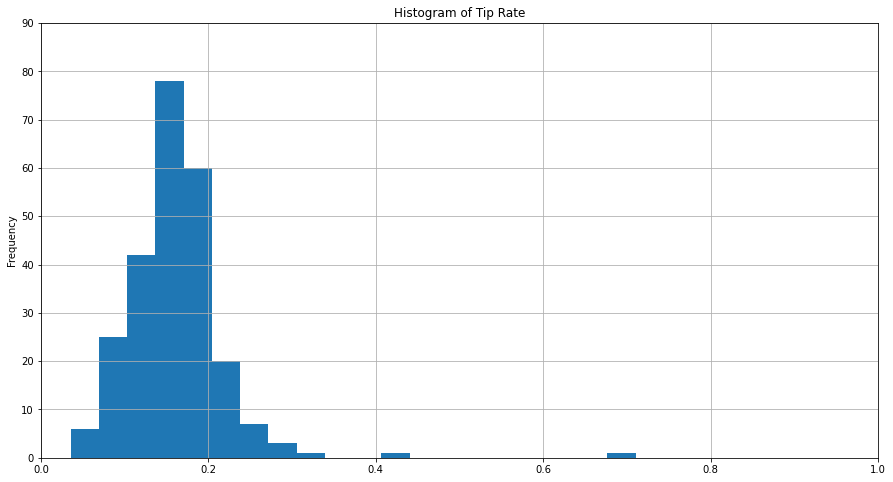

In [22]:
tips_df['tip_rate'].plot(kind = 'hist',
                        bins = 20,
                        title = 'Histogram of Tip Rate',
                        grid = True,
                        xlim = (0,1),
                        ylim = (0,90),
                        figsize = (15,8)
                       )

### Exercise 11: (5 points)
<span  style="color:purple; font-size:16px">Extract the entire row of data for the 10 largest and 10 smallest values of `tip_rate`. This can be done different ways but these steps are one way. First, extract the 10 largest values and save this as a DataFrame called 'largest'. Create a new variable called 'largest_indexes' which is the index of 'largest'. Use the `.loc()` method to extract all the data corresponding to those indexes.</span>

In [23]:
# Exercise Answer
largest = tips_df['tip_rate'].nlargest(10)
largest

172    0.710345
178    0.416667
67     0.325733
232    0.291990
183    0.280535
109    0.279525
149    0.266312
93     0.263480
221    0.259314
51     0.252672
Name: tip_rate, dtype: float64

In [24]:
largest_indexes = largest.index
largest_indexes

Int64Index([172, 178, 67, 232, 183, 109, 149, 93, 221, 51], dtype='int64')

In [26]:
print('Entire Row of 10 Largest values of the Tip Rate')
tips_df.loc[largest_indexes,:]

Entire Row of 10 Largest values of the Tip Rate


,total_bill,tip_amount,sex,smoker,day_of_week,time,party_size,tip_rate
172,7.25,5.15,female,Yes,Sun,Dinner,2,0.710345
178,9.60,4.00,male,Yes,Sun,Dinner,2,0.416667
67,3.07,1.00,male,Yes,Sat,Dinner,1,0.325733
232,11.61,3.39,female,No,Sat,Dinner,2,0.291990
183,23.17,6.50,female,Yes,Sun,Dinner,4,0.280535
109,14.31,4.00,male,Yes,Sat,Dinner,2,0.279525
149,7.51,2.00,female,No,Thur,Lunch,2,0.266312
93,16.32,4.30,male,Yes,Fri,Dinner,2,0.263480
221,13.42,3.48,male,Yes,Fri,Lunch,2,0.259314
51,10.29,2.60,male,No,Sun,Dinner,2,0.252672


In [28]:
smallest = tips_df['tip_rate'].nsmallest(10)
smallest

237    0.035638
102    0.056433
57     0.056797
0      0.059447
187    0.065660
210    0.066534
48     0.071804
146    0.072961
240    0.073584
184    0.073983
Name: tip_rate, dtype: float64

In [29]:
smallest_indexes = smallest.index
smallest_indexes

Int64Index([237, 102, 57, 0, 187, 210, 48, 146, 240, 184], dtype='int64')

In [30]:
print('Entire Row of 10 Smallest values of the Tip Rate')
tips_df.loc[smallest_indexes,:]

Entire Row of 10 Smallest values of the Tip Rate


,total_bill,tip_amount,sex,smoker,day_of_week,time,party_size,tip_rate
237,32.83,1.17,female,Yes,Sat,Dinner,2,0.035638
102,44.30,2.50,male,Yes,Sat,Dinner,3,0.056433
57,26.41,1.50,male,No,Sat,Dinner,2,0.056797
0,16.99,1.01,male,No,Sun,Dinner,2,0.059447
187,30.46,2.00,female,Yes,Sun,Dinner,5,0.065660
210,30.06,2.00,female,Yes,Sat,Dinner,3,0.066534
48,28.55,2.05,female,No,Sun,Dinner,3,0.071804
146,18.64,1.36,male,No,Thur,Lunch,3,0.072961
240,27.18,2.00,male,Yes,Sat,Dinner,2,0.073584
184,40.55,3.00,female,Yes,Sun,Dinner,2,0.073983


### Exercise 12: (5 points)
<span  style="color:purple; font-size:16px">Create a bar graph showing the number of parties served on each day of the week. What day had the heaviest volume (in terms of number of tables served)? What day had the lowest volume?</span>

<AxesSubplot:title={'center':'Bar Graph Showing Proportion of the Car'}>

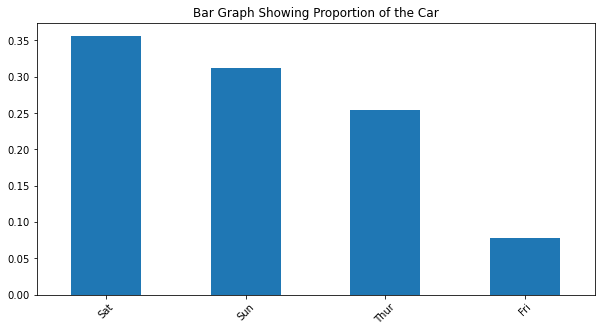

In [31]:
# Exercise Answer
tips_df['day_of_week'].value_counts(normalize=True).plot(kind='bar',
                                                   title='Bar Graph Showing Proportion of the Car',
                                                   rot =45,
                                                   figsize=(10,5))

### Exercise 13: (5 points)
<span  style="color:purple; font-size:16px">Find the total number of orders where the `total_bill` is greater than 40 dollars AND the party size was 4 or less.</span>

In [37]:
# Exercise Answer
filt = (tips_df['total_bill'] > 40) & (tips_df['party_size'] <= 4)

# Calculating total number of orders using sum()
Tot_orders = filt.sum()
print(f'Total number of orders where the total bill > 40 dollars and the party size was 4 or less is: {Tot_orders}')

Total number of orders where the total bill > 40 dollars and the party size was 4 or less is: 8


In [33]:
tips_df.loc[filt, :]

,total_bill,tip_amount,sex,smoker,day_of_week,time,party_size,tip_rate
59,48.27,6.73,female,No,Sat,Dinner,4,0.139424
95,40.17,4.73,female,Yes,Fri,Dinner,4,0.117750
102,44.30,2.50,male,Yes,Sat,Dinner,3,0.056433
170,50.81,10.00,female,Yes,Sat,Dinner,3,0.196812
182,45.35,3.50,female,Yes,Sun,Dinner,3,0.077178
184,40.55,3.00,female,Yes,Sun,Dinner,2,0.073983
197,43.11,5.00,male,Yes,Thur,Lunch,4,0.115982
212,48.33,9.00,female,No,Sat,Dinner,4,0.186220


### Exercise 14: (5 points)
<span  style="color:purple; font-size:16px">Who pays the bill more often: men or women? Create a pie chart and create a Series showing the proportion of bills paid by each `sex`.</span>

In [38]:
# Exercise Answer

<AxesSubplot:title={'center':'Pie Chart showing proportion of bills paid by each Sex'}, ylabel='sex'>

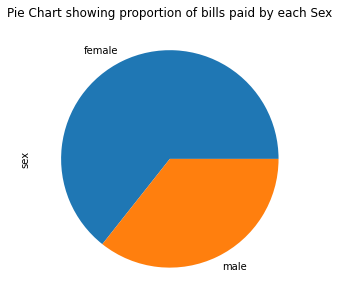

In [39]:
# Create pie chart, with some added features
tips_df['sex'].value_counts(normalize=True).plot(kind='pie',
                                                   title='Pie Chart showing proportion of bills paid by each Sex',
                                                   figsize=(10,5))

In [52]:
tips_by_sex = pd.Series(tips_df['sex'])
tips_by_sex

0        male
1      female
2      female
3      female
4        male
        ...  
239    female
240      male
241    female
242    female
243      male
Name: sex, Length: 244, dtype: object

In [53]:
pd.Series(tips_df['sex'].value_counts())

female    157
male       87
Name: sex, dtype: int64

Female Pay the Bill More often